In [223]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [229]:
import os
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

## 0. Load Data

In [3]:
path_info = '../archive_googleplaystore/googleplaystore.csv'
path_review = '../archive_googleplaystore/googleplaystore_user_reviews.csv'

In [4]:
app_info = pd.read_csv(path_info, index_col='App')
app_review = pd.read_csv(path_review)

In [5]:
app_info.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
app_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# 1. 전처리

#### 1-1. drop nulls, columns , rows

In [7]:
# info data: not much null data(except rating)
app_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [8]:
# review data: 행 별로 정보가 아예 있거나 없거나
app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
# null 있는 행 제거
app_review.dropna(axis =0, inplace = True)

In [10]:
# Type, Android/Current Ver columns drop
app_info.drop(['Type', 'Android Ver', 'Current Ver'], axis =1, inplace =True)

In [11]:
# Strange Row data 
display(app_info[app_info['Reviews'] =='3.0M'])
# Drop row
app_info.drop(app_info[app_info['Reviews'] =='3.0M'].index, axis =0, inplace =True)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Everyone,NaN,"February 11, 2018",1.0.19


#### 1-2. String to Float

In [12]:
app_info.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [13]:
app_info['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [14]:
def size_converter(x):
    if 'M' in x:
        return(float(x[:-1])*1000000)
    elif 'k' in x:
        return(float(x[:-1])*1000)
    else:
        return np.nan

def price_converter(x):
    if x != '0':
        return (float(x[1:]))
    else:
        return(0)
def install_converter(x):
    return float(x.replace('+','').replace(',',''))

In [15]:
app_info['Size']= app_info['Size'].apply(size_converter)
app_info['Price'] = app_info['Price'].apply(price_converter)
app_info['Installs'] = app_info['Installs'].apply(install_converter)

In [16]:
app_info

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0.0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0.0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0.0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,0.0,Everyone,Education,"July 25, 2017"
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,0.0,Everyone,Education,"July 6, 2018"
Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,0.0,Everyone,Medical,"January 20, 2017"


In [ ]:
# 전처리된 파일 저장
# app_info.to_csv(path_info[:-4]+'_preprocessed.csv')
# app_review.to_csv(path_info[:-4]+'_preprocessed.csv')

In [17]:
app_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9366 non-null   float64
 2   Reviews         10840 non-null  object 
 3   Size            9145 non-null   float64
 4   Installs        10840 non-null  float64
 5   Price           10840 non-null  float64
 6   Content Rating  10840 non-null  object 
 7   Genres          10840 non-null  object 
 8   Last Updated    10840 non-null  object 
dtypes: float64(4), object(5)
memory usage: 846.9+ KB


### 1-3. fill size null

In [206]:
app_info['Size'].replace('Varies with device', np.nan, inplace=True)

In [211]:
app_info['Size']=app_info['Size'].astype(str)

def k_to_m(x):
    if 'k' in x:
        return float(x.replace('k', ''))/1000
    else: return str(x)

app_info['Size']=app_info['Size'].apply(k_to_m)

app_info['Size']=app_info['Size'].apply(lambda x: x.replace('M',''))

app_info['Size']=app_info['Size'].apply(lambda x: float(x))

In [214]:
app_info['Size'].fillna(app_info.groupby('Category')['Size'].transform('mean'),inplace = True)
app_info['Size']=np.round(app_info['Size'],decimals=1)

# 2. 기초 분석

In [52]:
# 저장한 전처리 파일 다시 load
path_info_preprocessed = '../archive_googleplaystore/googleplaystore_preprocessed.csv'
path_review_preprocessed = '../archive_googleplaystore/googleplaystore_user_reviews_preprocessed.csv'
app_info = pd.read_csv(path_info_preprocessed)
app_review = pd.read_csv(path_review_preprocessed)

In [53]:
# top 10 Reviews 어플
data_r_rank = app_info.sort_values(by = 'Reviews', ascending = False)
data_r_rank = data_r_rank.head(30)

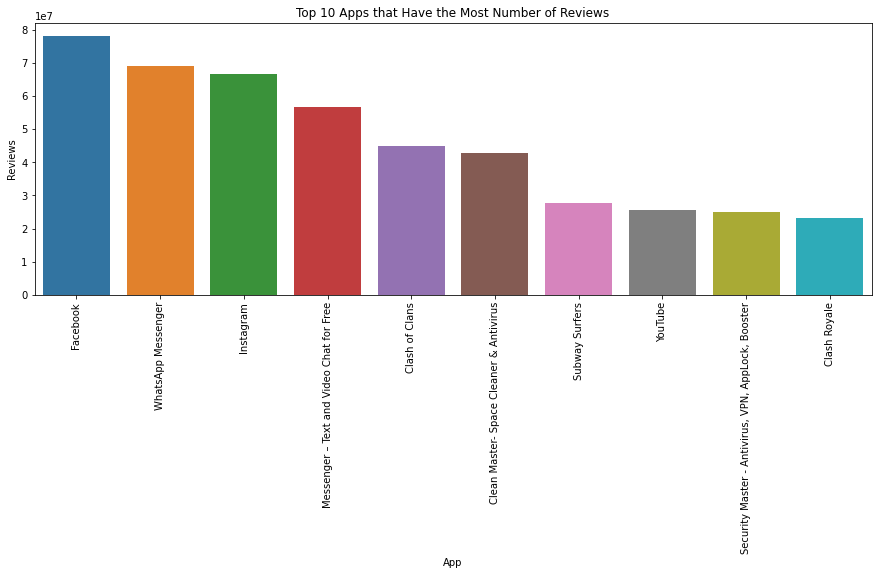

In [54]:
plt.figure(figsize = (15, 5))
sns.barplot(x='App', y='Reviews', data = data_r_rank)
plt.xticks(rotation = 90)
plt.ylabel('Reviews')
plt.title('Top 10 Apps that Have the Most Number of Reviews')
plt.show()

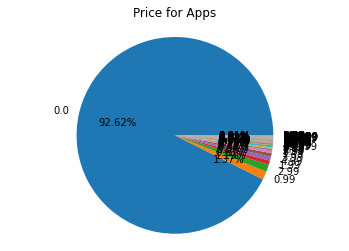

In [55]:
# 유료 앱 비중
price_app = ( app_info.Price.value_counts() / app_info.Price.value_counts().sum() ) * 100
price_app.plot.pie(autopct='%1.2f%%')

plt.ylabel('')
plt.title('Price for Apps', pad = 10)
plt.axis('equal')
plt.show()

주목할 점:
 1.Installs 와 Reviews의 상관관계 ↑
 2.Installs 와 Rating의 상관관계는 의외로 매우 낮다. -> 평점이 좋다고 다운로드가 높지 않다!


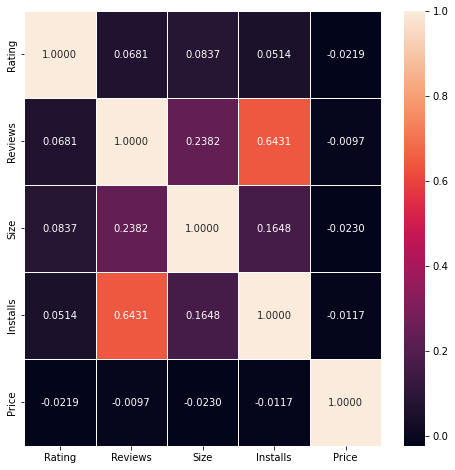

In [56]:
# 상관관계
plt.figure(figsize=(8, 8))
sns.heatmap(data = app_info.corr(), annot=True, fmt = '.4f', linewidths=.5)

print('주목할 점:\n 1.Installs 와 Reviews의 상관관계 ↑\n 2.Installs 와 Rating의 상관관계는 의외로 매우 낮다. -> 평점이 좋다고 다운로드가 높지 않다!')

In [75]:
# Installs 상위권과 하위권 비교
top_total = app_info.sort_values('Installs', ascending = False).head(1000).mean()
bot_total = app_info.sort_values('Installs',ascending = False).tail(1000).mean()

a = pd.DataFrame(top_t).rename(columns={0:'상위 10 %'})
b = pd.DataFrame(bot_t).rename(columns={0:'하위 10 %'})
c =pd.concat([a,b], axis = 1).drop('Reviews', axis =0 )
print('상위, 하위의 평점이 오히려 반대가 된걸 보면, 평점을 높인다고 다운로드가 올라갈 것으로 보이지는 않음!')
display(c)

# c.loc['Rating'] = c.loc['Rating'].apply(lambda x : round(x, 2) )
# c.loc['Size'] = c.loc['Size'].apply(lambda x: ((x // 1e+6) * 1e+6))
# c.loc['Installs']['상위 10 %'] = (c.loc['Installs']['상위 10 %']) // 1e+6 * 1e+6
# c.loc['Installs']['하위 10 %'] = (c.loc['Installs']['하위 10 %']) // 10 * 10
# c.loc['Price']= c.loc['Price'].apply(lambda x : x // 0.1 * 0.1)

상위, 하위의 평점이 오히려 반대가 된걸 보면, 평점을 높인다고 다운로드가 올라갈 것으로 보이지는 않음!


C:\Users\82107\AppData\Local\Temp/ipykernel_20716/458229815.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_total = app_info.sort_values('Installs', ascending = False).head(1000).mean()
C:\Users\82107\AppData\Local\Temp/ipykernel_20716/458229815.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bot_total = app_info.sort_values('Installs',ascending = False).tail(1000).mean()


,상위 10 %,하위 10 %
Rating,4.368200e+00,4.471774e+00
Size,4.272308e+07,1.423177e+07
Installs,1.510700e+08,3.908700e+01
Price,0.000000e+00,2.148680e+00


C:\Users\82107\AppData\Local\Temp/ipykernel_20716/4214194599.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_mean = app_info.groupby(['Category'])['Installs','Reviews'].mean()


카테고리별 성공지표(installs)가 상이하므로 카테고리별로 분석해보자!


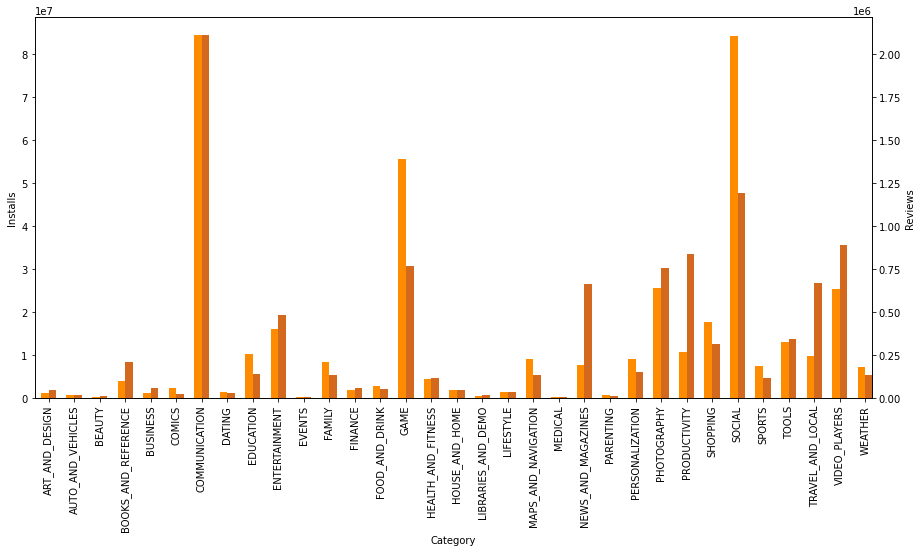

In [57]:
# 카테고리별 어플의 평균 Installs, Reviews

category_mean = app_info.groupby(['Category'])['Installs','Reviews'].mean()

fig = plt.figure(figsize =(15,7))
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width =0.3
category_mean['Installs'].plot(kind='bar',color='chocolate',ax=ax,width=width, position=0,)
category_mean['Reviews'].plot(kind='bar',color='darkorange', ax=ax2,width = width,position=1)
ax.set_ylabel('Installs')
ax2.set_ylabel('Reviews')

print('카테고리별 성공지표(installs)가 상이하므로 카테고리별로 분석해보자!')

### ※ 그렇다면 여기서 평균 다운로드가 높은 시장이 성공하기 좋은 시장일까?
### --> NO! 극 상위권의 독점시장인 카테고리도 존재

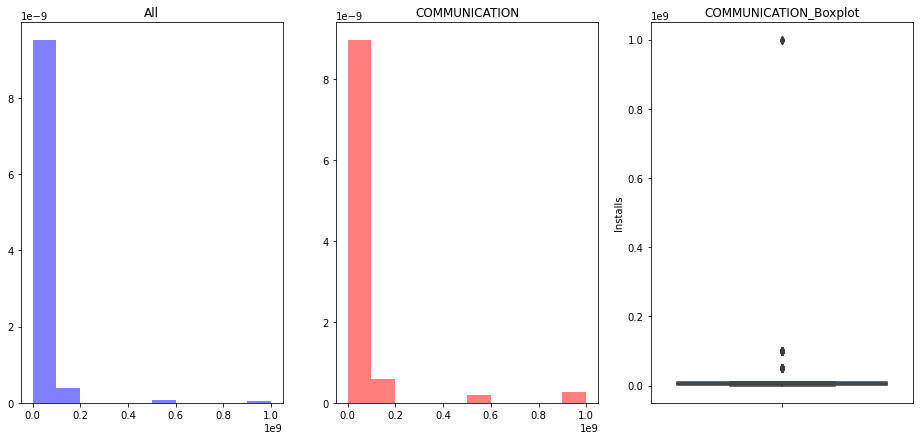

+ 추가적인 조사로 독점적인 카테고리가 있을거라고 판단!--> 이상치 제거하고 다시 비교


In [170]:
## Communication의 분포 확인!!
fig, axs = plt.subplots(1,3)
fig.set_figwidth(16)
fig.set_figheight(7)
axs[0].hist(app_info.Installs, alpha=0.5,color = 'blue', density=True)
axs[0].set_title('All')
axs[1].hist(app_info[app_info['Category']== 'SOCIAL'].Installs, alpha=0.5,color = 'red', density=True)
axs[1].set_title('COMMUNICATION')

sns.boxplot(y = app_info[app_info['Category']== 'PHOTOGRAPHY'].Installs,ax=axs[2])
axs[2].set_title("COMMUNICATION_Boxplot")


plt.show()

print('+ 추가적인 조사로 독점적인 카테고리가 있을거라고 판단!--> 이상치 제거하고 다시 비교')

### 이상치(Outlier) 제거 후 평균 installs

In [184]:
def out_remove_installs(category):
    install_lst=[]
    app_lst=[]
    for x in range(0,len(app_info)):
        if app_info.Category[x] == category:
            app_lst.append(app_info.App[x])
            install_lst.append(app_info.Installs[x])
    a = np.array(install_lst)
    q1,q3= np.percentile(a,[25,75])
    IQR = q3 - q1
    lower = q1 - (IQR*1.5)
    upper = q3 + (IQR*1.5) 
    
    return (a[np.where((lower<a) & (a<upper))])

In [186]:
s3 = app_info.groupby('Category').Installs.mean()
s4_dict = {}
for category in app_info.Category.unique():
    s4_dict[category] = out_remove_installs(category).mean()
s4= pd.Series(s4_dict, name='removed')

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

ART_AND_DESIGN         1.667518e+05
AUTO_AND_VEHICLES      2.266276e+05
BEAUTY                 2.391578e+05
BOOKS_AND_REFERENCE    1.656293e+05
BUSINESS               1.400246e+04
COMICS                 2.978917e+05
COMMUNICATION          2.474425e+06
DATING                 2.370712e+05
EDUCATION              3.101658e+06
ENTERTAINMENT          4.655338e+06
EVENTS                 2.584493e+04
FINANCE                2.410338e+05
FOOD_AND_DRINK         4.010181e+05
HEALTH_AND_FITNESS     2.194828e+06
HOUSE_AND_HOME         4.682286e+05
LIBRARIES_AND_DEMO     3.070631e+04
LIFESTYLE              1.847892e+05
GAME                   3.306782e+06
FAMILY                 2.276087e+05
MEDICAL                1.838255e+04
SOCIAL                 2.679472e+06
SHOPPING               3.468908e+06
PHOTOGRAPHY            3.527247e+06
SPORTS                 2.300472e+06
TRAVEL_AND_LOCAL       2.400368e+06
TOOLS                  1.950716e+05
PERSONALIZATION        1.932741e+05
PRODUCTIVITY           1.888

In [187]:
outlier_removed = pd.concat([s3,s4], axis=1)
outlier_removed['Before_rank'] = outlier_removed['Installs'].rank(ascending=False)
outlier_removed['After_rank'] = outlier_removed['removed'].rank(ascending=False)
outlier_removed

,Installs,removed,Before_rank,After_rank
ART_AND_DESIGN,1.912894e+06,1.667518e+05,24.0,28.0
AUTO_AND_VEHICLES,6.250613e+05,2.266276e+05,29.0,24.0
BEAUTY,5.131519e+05,2.391578e+05,31.0,21.0
BOOKS_AND_REFERENCE,8.318050e+06,1.656293e+05,12.0,29.0
BUSINESS,2.178076e+06,1.400246e+04,21.0,33.0
COMICS,9.347692e+05,2.978917e+05,27.0,16.0
COMMUNICATION,8.435989e+07,2.474425e+06,1.0,8.0
DATING,1.129533e+06,2.370712e+05,26.0,22.0
EDUCATION,5.586231e+06,3.101658e+06,14.0,5.0
ENTERTAINMENT,1.925611e+07,4.655338e+06,9.0,1.0


<AxesSubplot:>

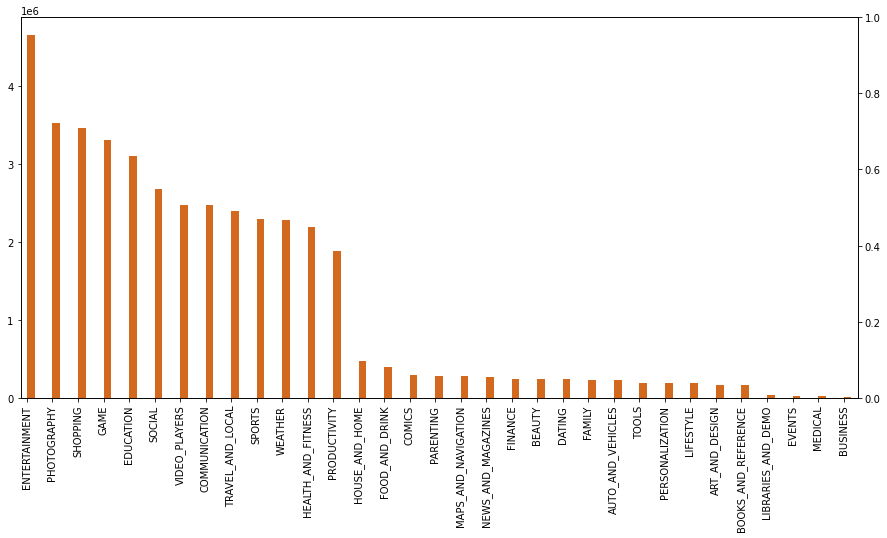

In [188]:
#이상치 제거후의 평균 installs 
fig = plt.figure(figsize =(15,7))
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width =0.3
outlier_removed.sort_values('After_rank')['removed'].plot(kind='bar',color='chocolate',ax=ax,width=width, position=0,)


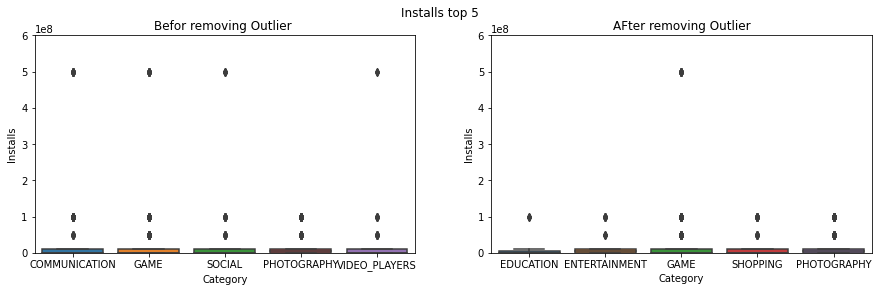

독점적인 시장이 줄어듬


In [189]:
# 이상치 제거 전 후의 비교
fig , axs = plt.subplots(1,2)
fig.set_figwidth(15)

sns.boxplot(data = app_info[(app_info.Category =='COMMUNICATION')|(app_info.Category =='SOCIAL')|(app_info.Category =='VIDEO_PLAYERS')|(app_info.Category =='PHOTOGRAPHY')|(app_info.Category =='GAME')], x = 'Category', y = 'Installs',ax = axs[0])
sns.boxplot(data = app_info[(app_info.Category =='ENTERTAINMENT')|(app_info.Category =='PHOTOGRAPHY')|(app_info.Category =='SHOPPING')|(app_info.Category =='GAME')|(app_info.Category =='EDUCATION')], x = 'Category', y = 'Installs',ax = axs[1])
# 범주형 다운로드수라 제일 높은 이상치는 모두 1e+9로 동일 하므로 y 범주 제한
axs[0].set_ylim(0,0.6e+9)
axs[1].set_ylim(0,0.6e+9)
plt.suptitle('Installs top 5')
axs[0].set_title('Befor removing Outlier ')
axs[1].set_title('AFter removing Outlier')

plt.show()

print('독점적인 시장이 줄어듬')

### 위의 상위 5개를 독점시장이 아니면서 성공률이 높은 카테고리로 판단, 분석 

# 3. 카테고리별 분석

  ##   3-1. 앱 데이터 분석

In [78]:
# 카테고리별 Content rating, one hot encoding
def content_rating_1_hot(category_name):
    df = app_info[app_info['Category']== category_name]
    df = pd.concat([pd.get_dummies(df,columns = ['Content Rating']), df['Content Rating']], axis = 1)
    return df

In [77]:
ent = content_rating_1_hot('ENTERTAINMENT')
edu = content_rating_1_hot('EDUCATION')
game =content_rating_1_hot('GAME')
photo = content_rating_1_hot('PHTOGRAPHY')
shop = content_rating_1_hot('SHOPPING')

### 3-1.  Entertainment:


Text(0, 0.5, 'price')

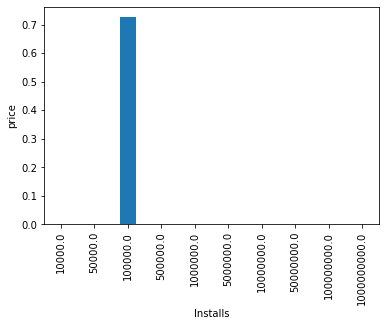

In [205]:
ent.groupby('Installs').mean()['Price'].plot(kind = 'bar')
plt.ylabel('price')

### 3-1.  GAME:


Text(0.5, 1.0, 'Game')

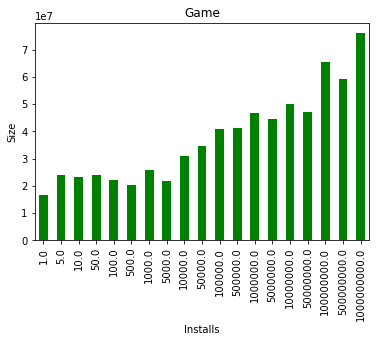

In [98]:
# game에서
game.groupby("Installs").mean()['Size'].plot(kind = 'bar', color = 'g')
plt.ylabel('Size')
plt.title('Game')

,Installs
Content Rating,
Everyone,3.421633e+07
Everyone 10+,7.198366e+07
Mature 17+,1.438679e+07
Teen,1.144415e+07


Text(0.5, 1.0, 'Game')

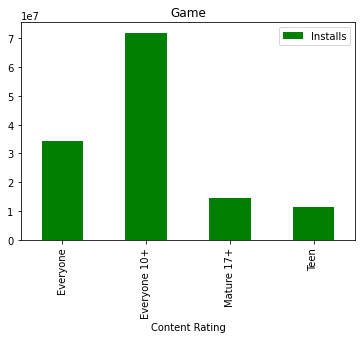

In [99]:
# 평균 다운로드와 연령제한의 관계
game_cr = pd.DataFrame(game.groupby('Content Rating').mean()['Installs'])
game_cr.plot(kind ='bar', color = 'g')
display(game_cr)
plt.title('Game')

### 3-1. EDUCATION:

Text(0.5, 1.0, 'Education')

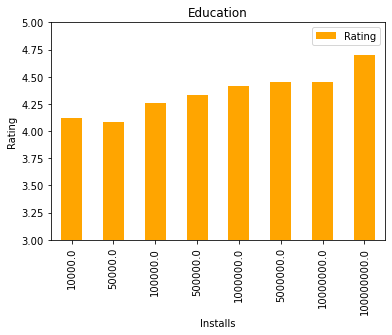

In [191]:
# Education 에서는 RAting과 installs의 상관관계가 강하다!
pd.DataFrame(edu.groupby('Installs').mean()['Rating'].iloc[1:]).plot(kind = 'bar', color = 'orange')
plt.ylim(3,5)
plt.ylabel('Rating')
plt.title('Education')

## 3-2. 리뷰 데이터 + 카테고리별 리뷰데이터 분석

### 전체 리뷰 Word Cloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
# 폰트, 이미지 저장
FONT_PATH='../archive_googleplaystore/Product Sans Regular.ttf'
mask=np.array(Image.open("../archive_googleplaystore/googleplaystore.jpg"))

In [230]:
all_rev=app_review['Translated_Review'].tolist()

all_rev=' '.join(all_rev)

import re
all_text=re.sub("[^a-zA-Z]"," ", all_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
all_text=all_text.lower() #소문자화


import nltk
from nltk.corpus import stopwords
all_text=nltk.word_tokenize(all_text) #Tokenize
all_text_filtered=[word for word in all_text if word not in stopwords.words('english')] #Stopwords 제거

import nltk as nlp
lemma=nlp.WordNetLemmatizer() #Lemmatization (apps -> app 이런 식으로)
all_text_lemma=[lemma.lemmatize(i) for i in all_text_filtered]
all_text=[" ".join(all_text_lemma)]

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(all_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

KeyboardInterrupt: 

### Sentiment별 Word Cloud

In [ ]:
sent_dct = {}
for sent in app_review.Sentiment.unique().tolist():

    print(sent)
    sent_reviews =app_review[app_review['Sentiment'] == sent]
    
    all_rev=app_review['Translated_Review'].tolist()

    all_rev=' '.join(all_rev)

    import re
    all_text=re.sub("[^a-zA-Z]"," ", all_rev) 
    all_text=all_text.lower() 

    import nltk
    from nltk.corpus import stopwords
    all_text=nltk.word_tokenize(all_text)
    all_text_filtered=[word for word in all_text if word not in stopwords.words('english')]

    import nltk as nlp
    lemma=nlp.WordNetLemmatizer()
    all_text_lemma=[lemma.lemmatize(i) for i in all_text_filtered] 
    all_text=[" ".join(all_text_lemma)]


#Word Cloud 생성

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(
    background_color="white",
    width=300,
    height=300,
    font_path=FONT_PATH,
    color_func=ImageColorGenerator(mask),
    mask=mask).generate_from_text(" ".join(all_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 카테고리별 WordCloud

In [ ]:
review2=app_review.groupby('App').mean()

review_apps=review2.index.tolist()
app_with_reviews=[]
for name in review_apps:
    if name in app_info['App'].unique().tolist():
        app_with_reviews.append(name)
        
drop_lst=[]
for x in range(0,len(app_info)):
    if app_info.App[x] not in app_with_reviews or app_info.App[x] in app_info.App.iloc[:x].values:
        drop_lst.append(x)
appdata2=app_info.drop(index=drop_lst).reset_index(drop=True)


drop_lst2=[]
for x in range(0,len(review2)):
    if review2.index[x] not in app_with_reviews:
        drop_lst2.append(review2.index[x])
review3=review2.drop(index=drop_lst2)
        
data=pd.merge(appdata2,review3, left_on='App', right_on='App')
        
        
df_review_only=app_review.drop(columns=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

df_review_only2=df_review_only.drop(df_review_only[~df_review_only['App'].isin(app_with_reviews)].index)


review_only3=df_review_only2.groupby(['App'], as_index=False).agg({'Translated_Review':' '.join})

lst=[]
for k in review_only3.App:
    for index in range(0,len(data)):
        if data.App[index] == k:
            lst.append(data.Category[index])
s1 = pd.Series(lst)

review_only3['Category']=s1
review_only3=review_only3[['App', 'Category', 'Translated_Review']]

In [ ]:
cat_dct = {}
for cat in app_info.Category.unique().tolist():

    print(cat)
    category_reviews=review_only3[review_only3['Category']==cat]
    cat_rev=category_reviews['Translated_Review'].tolist()
    cat_rev=' '.join(cat_rev)
    for k in ['love','app','great','work','time','good','really','like','thank']:
        cat_rev=cat_rev.replace(k,'')

    cat_text=re.sub("[^a-zA-Z]"," ", cat_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
    cat_text=cat_text.lower() #소문자화

    cat_text=nltk.word_tokenize(cat_text)
    cat_text_filtered=[word for word in cat_text if word not in stopwords.words('english')]
    
    lemma=nltk.WordNetLemmatizer()
    cat_text_lemma=[lemma.lemmatize(i) for i in cat_text_filtered]
    cat_text=[" ".join(cat_text_lemma)]
       
    plt.subplots(figsize=(10,10))
    wordcloud=WordCloud(
        background_color="white",
        width=300,
        height=300,
        font_path=FONT_PATH,
        color_func=ImageColorGenerator(mask),
        mask=mask).generate_from_text(" ".join(cat_text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### 1. 카테고리 명, 2. 상위권 리뷰, 3. 중위권 리뷰 WordCloud

In [ ]:
#리뷰 존재하는 상위권(upper outlier) 앱 추출
def out_with_reviews(category):
    a_lst=[]
    install_lst=[]
    app_lst=[]
    index_lst=[]
    for x in range(0,len(app_info)):
        if app_info.Category[x] == category:
            app_lst.append(app_info.App[x])
            install_lst.append(app_info.Installs[x])
    a = np.array(install_lst)
    q1,q3= np.percentile(a,[25,75])
    IQR = q3 - q1
    lower = q1 - (IQR*1.5)
    upper = q3 + (IQR*1.5)
    
    for index,value in enumerate(a):
        if (value >= upper):
            if app_lst[index] in (app_with_reviews):
                a_lst.append(app_lst[index])

    for k in range(0,len(review_only3)):
        if review_only3.App[k] in a_lst:
            index_lst.append(True)
        else:
            index_lst.append(False)
    
    return(np.array(index_lst))
                
    return a_lst 

In [ ]:
#리뷰 존재하는 outlier 아닌 앱 추출
def out_removed_reviews(category):
    a_lst=[]
    install_lst=[]
    app_lst=[]
    index_lst=[]
    for x in range(0,len(app_info)):
        if app_info.Category[x] == category:
            app_lst.append(app_info.App[x])
            install_lst.append(app_info.Installs[x])
    a = np.array(install_lst)
    q1,q3= np.percentile(a,[25,75])
    IQR = q3 - q1
    lower = q1 - (IQR*1.5)
    upper = q3 + (IQR*1.5)
    
    for index,value in enumerate(a):
        if (lower<= value <= upper):
            if app_lst[index] in (app_with_reviews):
                a_lst.append(app_lst[index])
    
    for k in range(0,len(review_only3)):
        if review_only3.App[k] in a_lst:
            index_lst.append(True)
        else:
            index_lst.append(False)
    
    return(np.array(index_lst))

    return (a_lst)

In [ ]:
cat_dct = {}
for cat in app_info.Category.unique().tolist():

    print(cat)
    category_reviews=review_only3[out_with_reviews(cat)]
    cat_rev=category_reviews['Translated_Review'].tolist()
    cat_rev=' '.join(cat_rev)
    for k in ['love','app','great','work','time','good','really','like','thank']:
        cat_rev=cat_rev.replace(k,'')

    cat_text=re.sub("[^a-zA-Z]"," ", cat_rev) #문자를 제외한 나머지 요소 공백으로 바꿈
    cat_text=cat_text.lower() #소문자화

    cat_text=nltk.word_tokenize(cat_text)
    cat_text_filtered=[word for word in cat_text if word not in stopwords.words('english')]
    
    lemma=nltk.WordNetLemmatizer()
    cat_text_lemma=[lemma.lemmatize(i) for i in cat_text_filtered]
    cat_text=[" ".join(cat_text_lemma)]
    
    try:
        plt.subplots(figsize=(10,10))
        wordcloud=WordCloud(
            background_color="white",
            width=300,
            height=300,
            font_path=FONT_PATH,
            color_func=ImageColorGenerator(mask),
            mask=mask).generate_from_text(" ".join(cat_text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except:
        print('결과 없음')
        pass
    
    dog_reviews=review_only3[out_removed_reviews(cat)]
    dog_rev=dog_reviews['Translated_Review'].tolist()
    dog_rev=' '.join(dog_rev)
    for k in ['love','app','great','work','time','good','really','like','thank']:
        dog_rev=dog_rev.replace(k,'')

    dog_text=re.sub("[^a-zA-Z]"," ", dog_rev)
    dog_text=dog_text.lower()

    dog_text=nltk.word_tokenize(dog_text)
    dog_text_filtered=[word for word in dog_text if word not in stopwords.words('english')]
    
    lemma=nltk.WordNetLemmatizer()
    dog_text_lemma=[lemma.lemmatize(i) for i in dog_text_filtered]
    dog_text=[" ".join(dog_text_lemma)]
    
    try:
        plt.subplots(figsize=(10,10))
        wordcloud=WordCloud(
            background_color="white",
            width=300,
            height=300,
            font_path=FONT_PATH,
            color_func=ImageColorGenerator(mask),
            mask=mask).generate_from_text(" ".join(dog_text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except:
        print('결과 없음')
        pass